### Breast cancer is one of the leading cancer occuring in adult females. Early diagnosis of breast cancer and early classification of the tumor as benign or malignant can help the cancer patients. This project is based on looking through data of previous cancer patients and training a machine learning model that can early classify a cacerous tumor as benign or malignant based on different factors. 

data source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

The features are derived from a digitized image of a fine needle aspirate (FNA) of a breast mass, representing characteristics of cell nuclei present. Sample images can be accessed here.

The separation boundary mentioned above was achieved using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification approach utilizing linear programming for constructing decision trees. Pertinent features were chosen through exhaustive search within the 1-4 feature and 1-3 separating plane space.

The specific linear program employed for obtaining the separation boundary in a 3-dimensional space is detailed in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

### Importing the necessary libraries to import and check data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Importing the data file and assigning proper column names based on the data source

In [2]:
df= pd.read_csv(r"D:\ML_projects\breast+cancer+wisconsin+diagnostic\wdbc.data", names = ["ID","diagnosis","radius1","texture1",
                                                                                         "perimeter1", "area1", "smoothness1", "compactness1",
                                                                                         "concavity1", "concave_points1","symmetry1", "fractal_dimension1",
                                                                                         "radius2","texture2","perimeter2", "area2", "smoothness2", "compactness2",
                                                                                         "concavity2", "concave_points2","symmetry2","fractal_dimension2", "radius3",
                                                                                         "texture3","perimeter3", "area3","smoothness3","compactness3","concavity3",
                                                                                         "concave_points3","symmetry3","fractal_dimension3"])

## What are the questions we are trying to answer?
#### What are the most important factors in determining whether a breast cancer is benign or malignant?
#### Is there any ethical concern with this project?
#### Is the final machine learning model able to make this prediction on untrained data fairly accurately?
#### What is the most important parameter to measure the success of this model?

### Initial Exploratory data analysis and Data Cleaning

In [3]:
df.head(10)

,ID,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


The column ID represents the different cases/patients. THe "Diagnosis" column represents where the tumor was classified as malignant (M) or benign (B). The other columns are the features describig physical three dimentional properties/appearance of the tumor cell nuclei under the microscope.

### Basic information about the dataset

In [4]:
df.shape
print("The shape of the dataset: ",df.shape)

The shape of the dataset:  (569, 32)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

We see that all the features are in "float64" dtypes except "diagnosis" which is the dependent variable and is an object (categorical). The ID column is an integer column but only refers to indexing of different cases and should be dropped later.

In [6]:
#Let's check of distribution of the different cases
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The dataset is not highly skewed for one case which makes logistic regression model a good option. We also see that the total number of cases in not very huge which can impact the model accuracy on unseen data.

In [7]:
#Let us drop the column "ID"
df.drop('ID', axis = 1, inplace = True)
df.head(10)

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Gather Descriptive Statistics for the data

In [8]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We do not see anything unusual in the dataset's descriptive statistice.

### Check for any missing data entries


In [9]:
# make a vector of rows where any of the data entries is null or missing
mask = df.isna().any(axis = 1)
df[mask]

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3


There are no missing values in the dataset

   ### Let us check for duplicate values

In [10]:
dupliate = df.duplicated() # a boolean of duplicates
df[dupliate]

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3


There are no duplicate entries in the dataset

In [11]:
# df.drop_duplicates()

### Considering outliers
The outliers in case of cancer would be important and it is necessary to include them since tumor cells showing highly outlier characteristics are possible and it is important that we can classify them.

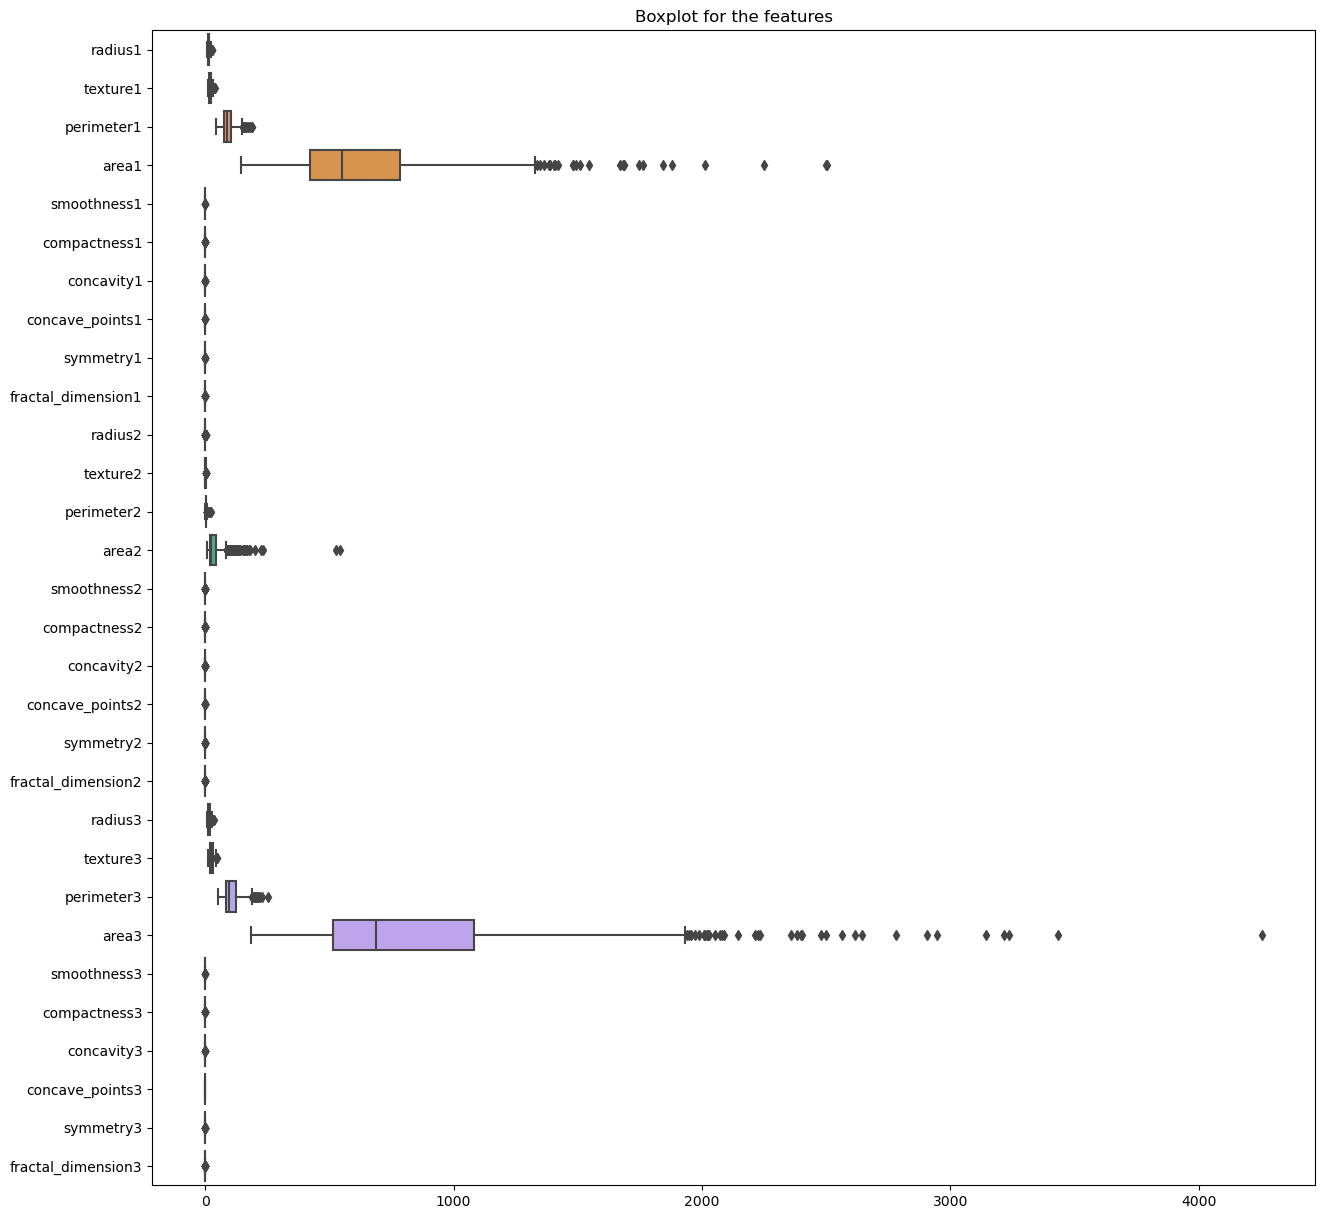

In [12]:
fig, ax = plt.subplots(figsize = [15,15])
sns.boxplot(data = df.drop('diagnosis', axis = 1), ax = ax, orient = 'h')
plt.title("Boxplot for the features");


#### The outliers are important in this case as they can represent specific types and variations of breast cancer cells.

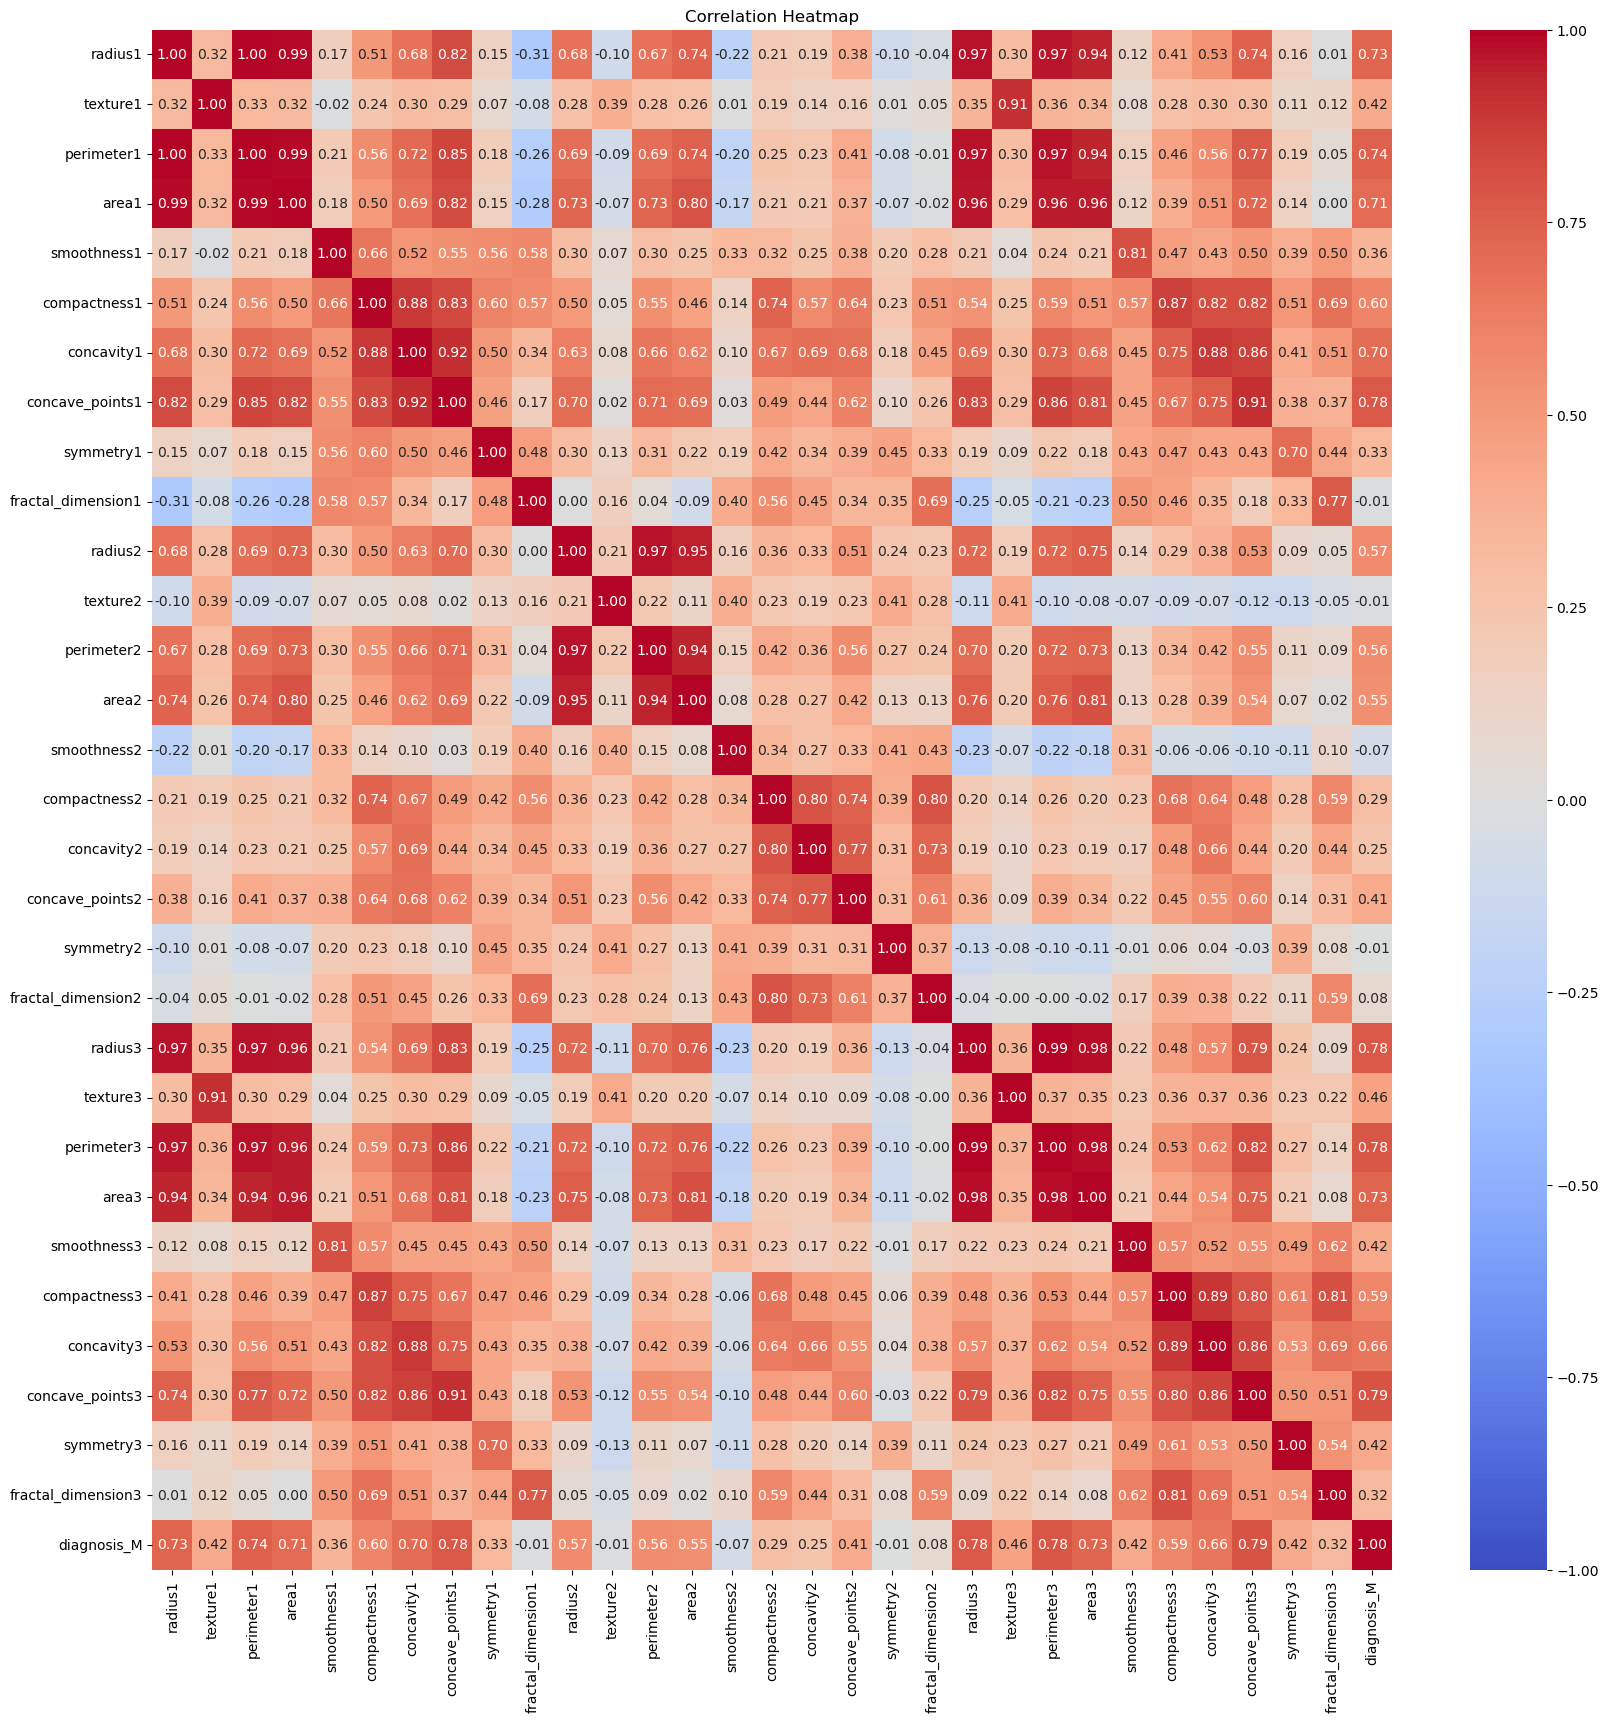

In [13]:
df_corr = pd.get_dummies(df, columns=["diagnosis"], drop_first = True) #convert diagnosis into categorical data columns
corr_matrix = df_corr.corr()
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = ".2f", vmin = -1, vmax = 1)
ax.set_title("Correlation Heatmap");

A lot of darker red shape on the correlation map suggests high correlation between different vaiables. 

It appears that "diagnosis" has decent correlation with all the variables except "fractal_dimension1", "texture2", "symmetry2" and "fractal_dimensions2". We could drop these columns, but because of the nature of cancer cells and the context given, it may be better to keep them just in case.

We also see there is high correlation between certain features ["perimeter1","radius1","area1","perimeter3","radius3","area3"]. So, we should regularization to deal with multicollinearity.

In [14]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing as sp
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
X = df_corr.drop('diagnosis_M', axis  = 1)
y = df_corr['diagnosis_M']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 42)

In [17]:
X_train.shape

(455, 30)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
LogReg  = LogisticRegression(solver = "liblinear", C = 0.2, fit_intercept= True, random_state= 10, multi_class= "ovr")

In [20]:
# Lets create a pipeline to standarize the data following by logistic regression so our model can do both
model = Pipeline([('scalar', StandardScaler()),
                    ('LogReg', LogReg)])


In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('LogReg',
                 LogisticRegression(C=0.2, multi_class='ovr', random_state=10,
                                    solver='liblinear'))])

In [22]:
# Predicted values for the y
y_pred = model.predict(X_test)

In [23]:
# Model accuracy score on traning data
model.score(X_train, y_train)

0.9868131868131869

In [24]:
#Model Accuract score on test data
model.score(X_test, y_test)

0.9912280701754386

In [25]:
# Measure of the model's performace on train data
y_pred1 = model.predict(X_train)
# Accuracy
accuracy = accuracy_score(y_train, y_pred1)

# Precision
precision = precision_score(y_train, y_pred1)

# Recall
recall = recall_score(y_train, y_pred1)

# F1 Score
f1 = f1_score(y_train, y_pred1)

print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.99
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


In [26]:
# Measure of the model's performace
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))
precision

Accuracy: 0.99
Precision: 1.0
Recall: 0.98
F1 Score: 0.99


1.0

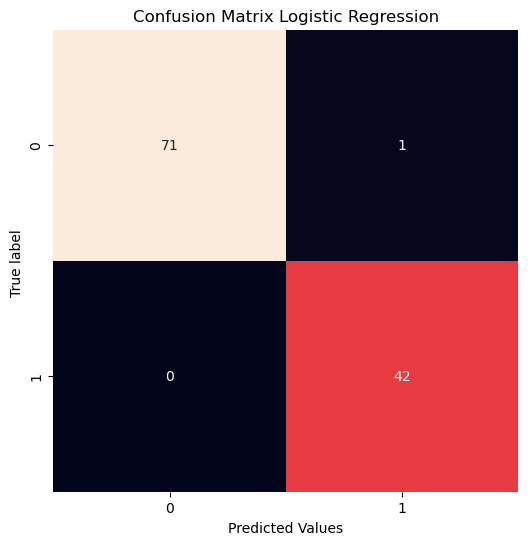

In [27]:
cm = confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm, annot =True, cbar = False, ax = ax)
plt.xlabel('Predicted Values')
plt.ylabel('True label ');
plt.title('Confusion Matrix Logistic Regression');

Let us also check AUC ROC to check our model performance

In [28]:
# Predict probabilities for test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

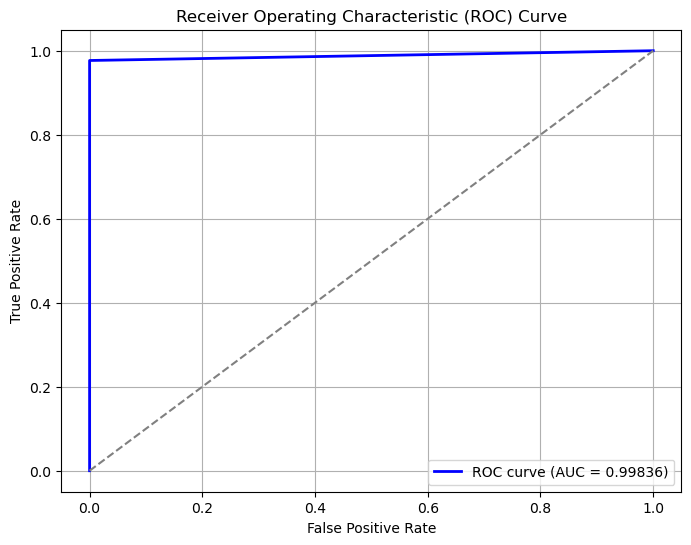

In [30]:
# Plot ROC curve
fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % auc)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.grid(True)
plt.show()

### This model performs really well on both training and test data. Let us try another more complex machine learning algorithm for binary classification, a Random Forest Classifier and see it performs:

In [31]:
#import the machine learning model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
rfc = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [10, 50, 100,],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_GS = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, scoring = 'recall')

# Perform grid search on the training data


In [33]:
rf_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

In [34]:
best_rfc = rf_GS.best_estimator_

In [35]:
# Measure of the model's performace on train data
y_pred1 = best_rfc.predict(X_train)
# Accuracy
accuracy = accuracy_score(y_train, y_pred1)

# Precision
precision = precision_score(y_train, y_pred1)

# Recall
recall = recall_score(y_train, y_pred1)

# F1 Score
f1 = f1_score(y_train, y_pred1)

print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.99
Precision: 1.0
Recall: 0.98
F1 Score: 0.99


In [36]:
# Measure of the model's performace on test data
y_pred = best_rfc.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1 Score: 0.95


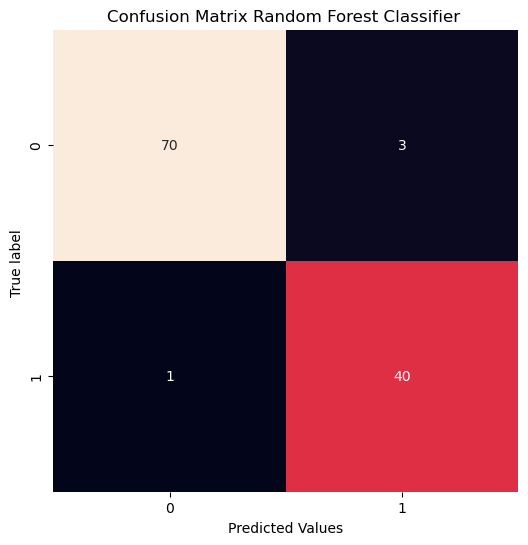

In [37]:
cm = confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm, annot =True, cbar = False, ax = ax)
plt.xlabel('Predicted Values')
plt.ylabel('True label ')
plt.title('Confusion Matrix Random Forest Classifier ');

In [38]:
# Predict probabilities for test set
y_probs = best_rfc.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

In [39]:
auc

0.9957418932197838

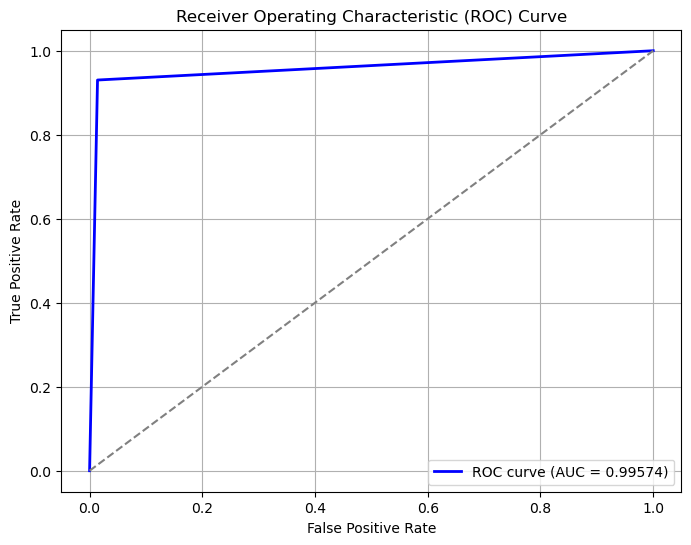

In [40]:
# Plot ROC curve
fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.5f)' % auc)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.grid(True)
plt.show()

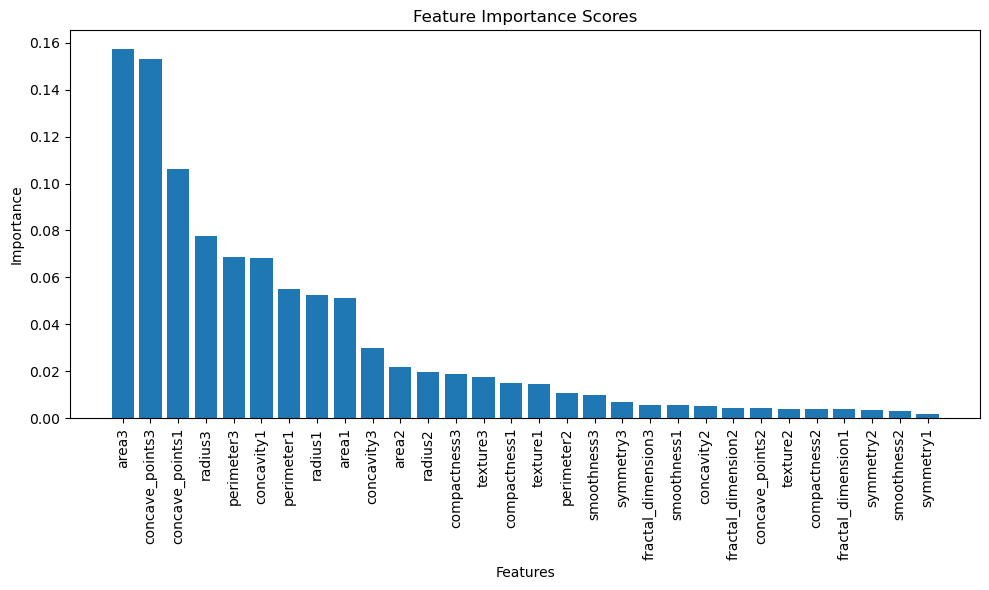

In [41]:
feature_importances = best_rfc.feature_importances_

# Get the feature names from X_train
feature_names = X_train.columns.tolist()

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

## The questions we were trying to answer:
### What are the most important factors in determining whether a breast cancer is benign or malignant?
- Area3, concave_point3 and concave_point1 are the top features that determine which class cancer cell.

### Is there any ethical concern with this project?
- The data contains ID to distinguish the different patients and does not contain any personal details. So, their privacy is respected. However, one ethical concern is whether patients agreed to let these data be used for these purpose or not.

### Is the final machine learning model able to make this prediction on untrained data fairly accurately?
- It appears that both both logistic regression model and random forest classifier perform very well on test data. However, it will be a good idea to test this model on more unseen data before applying due to the fact that wrong predictions from this data can have very detrimental affects on patients. For example, a malignant cancer patient misclassified as benign may delay or get delayed in healthcare attention.

### What is the most important parameter to measure the success of this model?
- Besides accuracy, a false negative (malignant cancer classified as benign) is very unfavourable while the opposite is not that problematic. Hence, we want model that has high *recall*.

### Random Forest Classifier performs very well but not as good as Logistic regression modelling. Possible reasons for this:

- The relationship between features and the target variable "diagnosis" is predominantly linear or only a few features are important for prediction. Random Forest may not capture this relationship as effectively. Given the nature of the data given, this can be the case.

- Our data is not very large. The size of dataset can affect different model performance. Given the more complex nature of Random Classifier, it is possible for it to overfit. Looking at the performance of Random Forest Classifier on training data, this looks like the case. A precision value of 1 along with very high accuracy and F1 score on training data indicates possible overfitting.


### Ways to further improve the model and next steps.

- The logistic regression model seems to be a better model and perform very well on test data. We can use this model to classify tumors as benign or malignant based on new data related to the respective cancer cells.

- Since, our dataset contained only a couple hundred data points, it is possible that we did not capture all the way these features can impact the classification of a cell as malignant or benign.

- Training these models with a much larger dataset if available would be a good idea. That would enable us to get a more robust model that performs well in case of new unseen data. Since we have high multicollinearity between some variables, being able to use Random Forest Classifier could be better since it is more robust to multicollinearity.